
# Segmenting and Clustering Neighborhoods in Toronto
In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.


For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.
1- Start by creating a new Notebook for this assignment.
2- Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe

## Pre-processing


# Start by creating a new Notebook for this assignment.
## setup import

In [1]:
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup


In [2]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']


More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [3]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()


 If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [4]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']


Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.

In [5]:
df.head(7)

Postcode      Borough                                Neighbourhood
0      M1B  Scarborough                               Rouge, Malvern
1      M1C  Scarborough       Highland Creek, Rouge Hill, Port Union
2      M1E  Scarborough            Guildwood, Morningside, West Hill
3      M1G  Scarborough                                       Woburn
4      M1H  Scarborough                                    Cedarbrae
5      M1J  Scarborough                          Scarborough Village
6      M1K  Scarborough  East Birchmount Park, Ionview, Kennedy Park

In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [6]:
df.shape

(103, 3)


# Processing-part-1: extracting raw table 

In [7]:
import wikipedia as wp
import pandas as pd 

import requests
import io


Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
enter the h1 element in wp.page(h1)

In [8]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")


In [9]:
# determine the index of your table
df = pd.read_html(html, header = 0)[0]

Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [10]:
df = df[df.Borough != 'Not assigned']

More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [11]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

 If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [12]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

 in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [13]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))


In [14]:
# rename the first column to allow merging dataframes on Postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

In [15]:
# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
df.head(7)

Postcode      Borough                                Neighbourhood  \
0      M1B  Scarborough                               Rouge, Malvern   
1      M1C  Scarborough       Highland Creek, Rouge Hill, Port Union   
2      M1E  Scarborough            Guildwood, Morningside, West Hill   
3      M1G  Scarborough                                       Woburn   
4      M1H  Scarborough                                    Cedarbrae   
5      M1J  Scarborough                          Scarborough Village   
6      M1K  Scarborough  East Birchmount Park, Ionview, Kennedy Park   

    Latitude  Longitude  
0  43.806686 -79.194353  
1  43.784535 -79.160497  
2  43.763573 -79.188711  
3  43.770992 -79.216917  
4  43.773136 -79.239476  
5  43.744734 -79.239476  
6  43.727929 -79.262029


## Processing-part-2: integrating Postal codes with more than 1 neighbour


In [16]:
%matplotlib inline

import wikipedia as wp
import pandas as pd 

import requests
import io

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
        enter the h1 element in wp.page(h1)

In [17]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [18]:
df = df[df.Borough != 'Not assigned']

 More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [19]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()


 If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [21]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [22]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))


In [23]:
# rename the first column to allow merging dataframes on Postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

In [24]:
# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


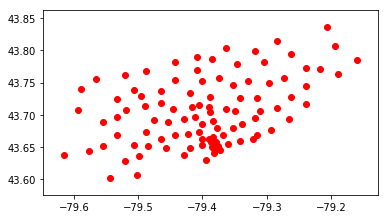

In [25]:
# load latitude and longitude into geopandas dataframe
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()